In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_data = pd.read_csv('datasets/titanic.csv')

In [3]:
titanic_data.corr()
# No two feature has high correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [4]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
columns_to_drop = ['PassengerId','Name','Ticket','Cabin']
titanic_data = titanic_data.drop(columns_to_drop,axis=1)

In [6]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


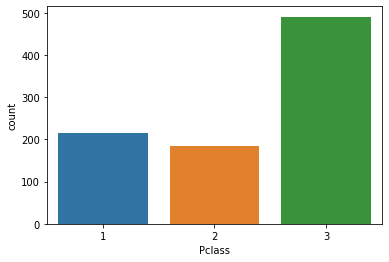

In [7]:
sns.countplot('Pclass',data=titanic_data)
plt.show()

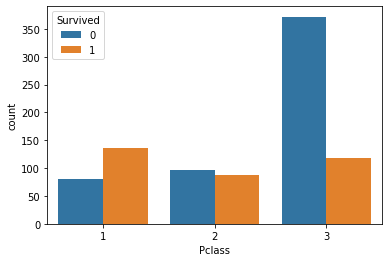

In [8]:
sns.countplot('Pclass',data=titanic_data,hue='Survived')
plt.show()

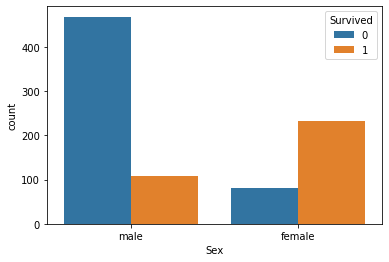

In [9]:
sns.countplot('Sex', data = titanic_data , hue='Survived')
plt.show()

/Users/bijesh/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/bijesh/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


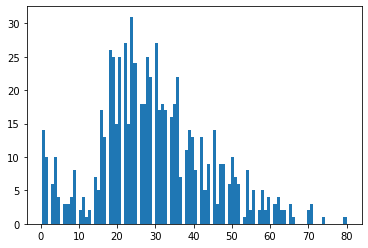

In [10]:
plt.hist('Age', data=titanic_data,bins=100)
plt.show()

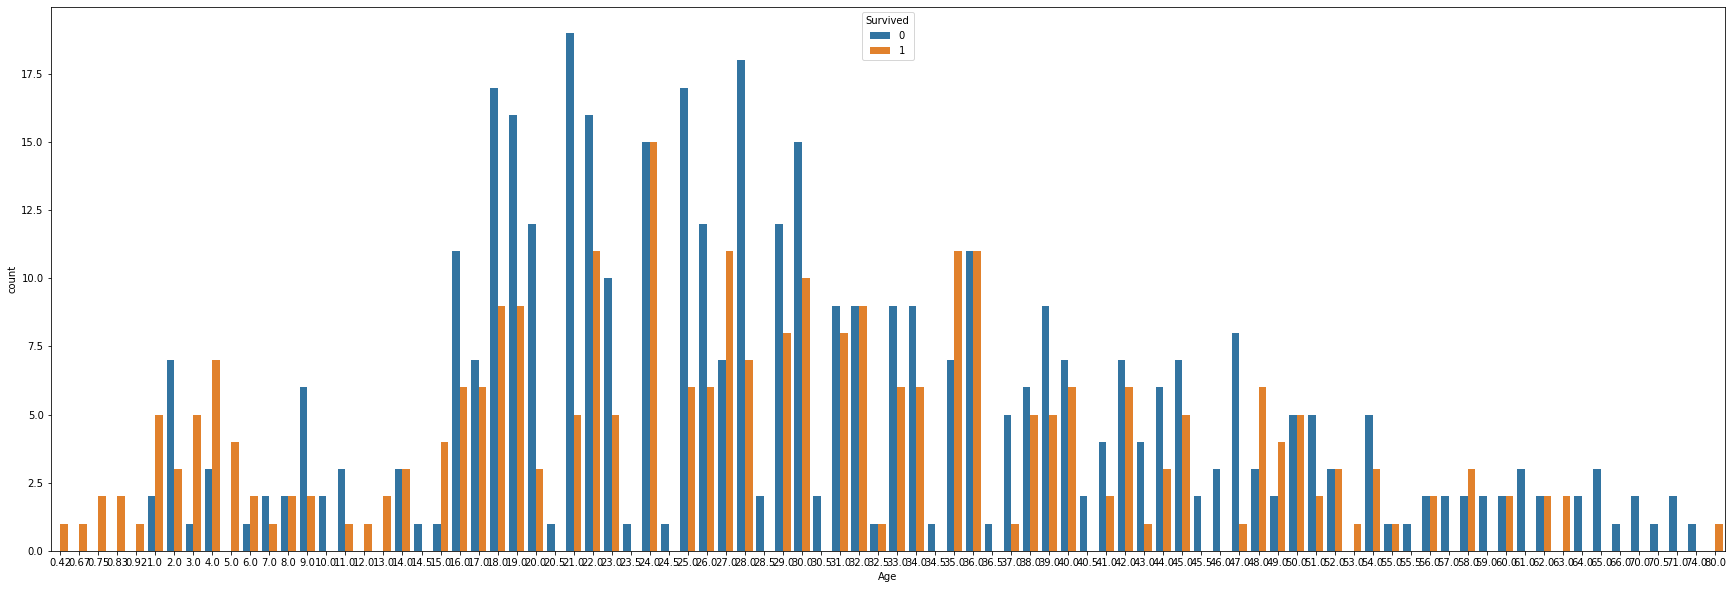

In [11]:
plt.figure(figsize=(30,10))
sns.countplot('Age', data=titanic_data, hue='Survived')
plt.show()

In [12]:
titanic_data['Family'] = titanic_data['SibSp'] + titanic_data['Parch']

In [13]:
titanic_data = titanic_data.drop(['SibSp','Parch'],axis=1)

In [14]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


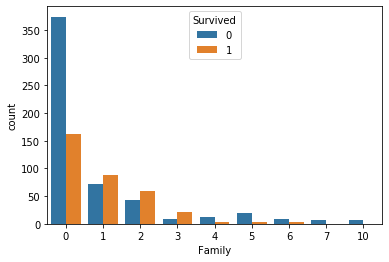

In [15]:
sns.countplot('Family', data=titanic_data, hue='Survived')
plt.show()

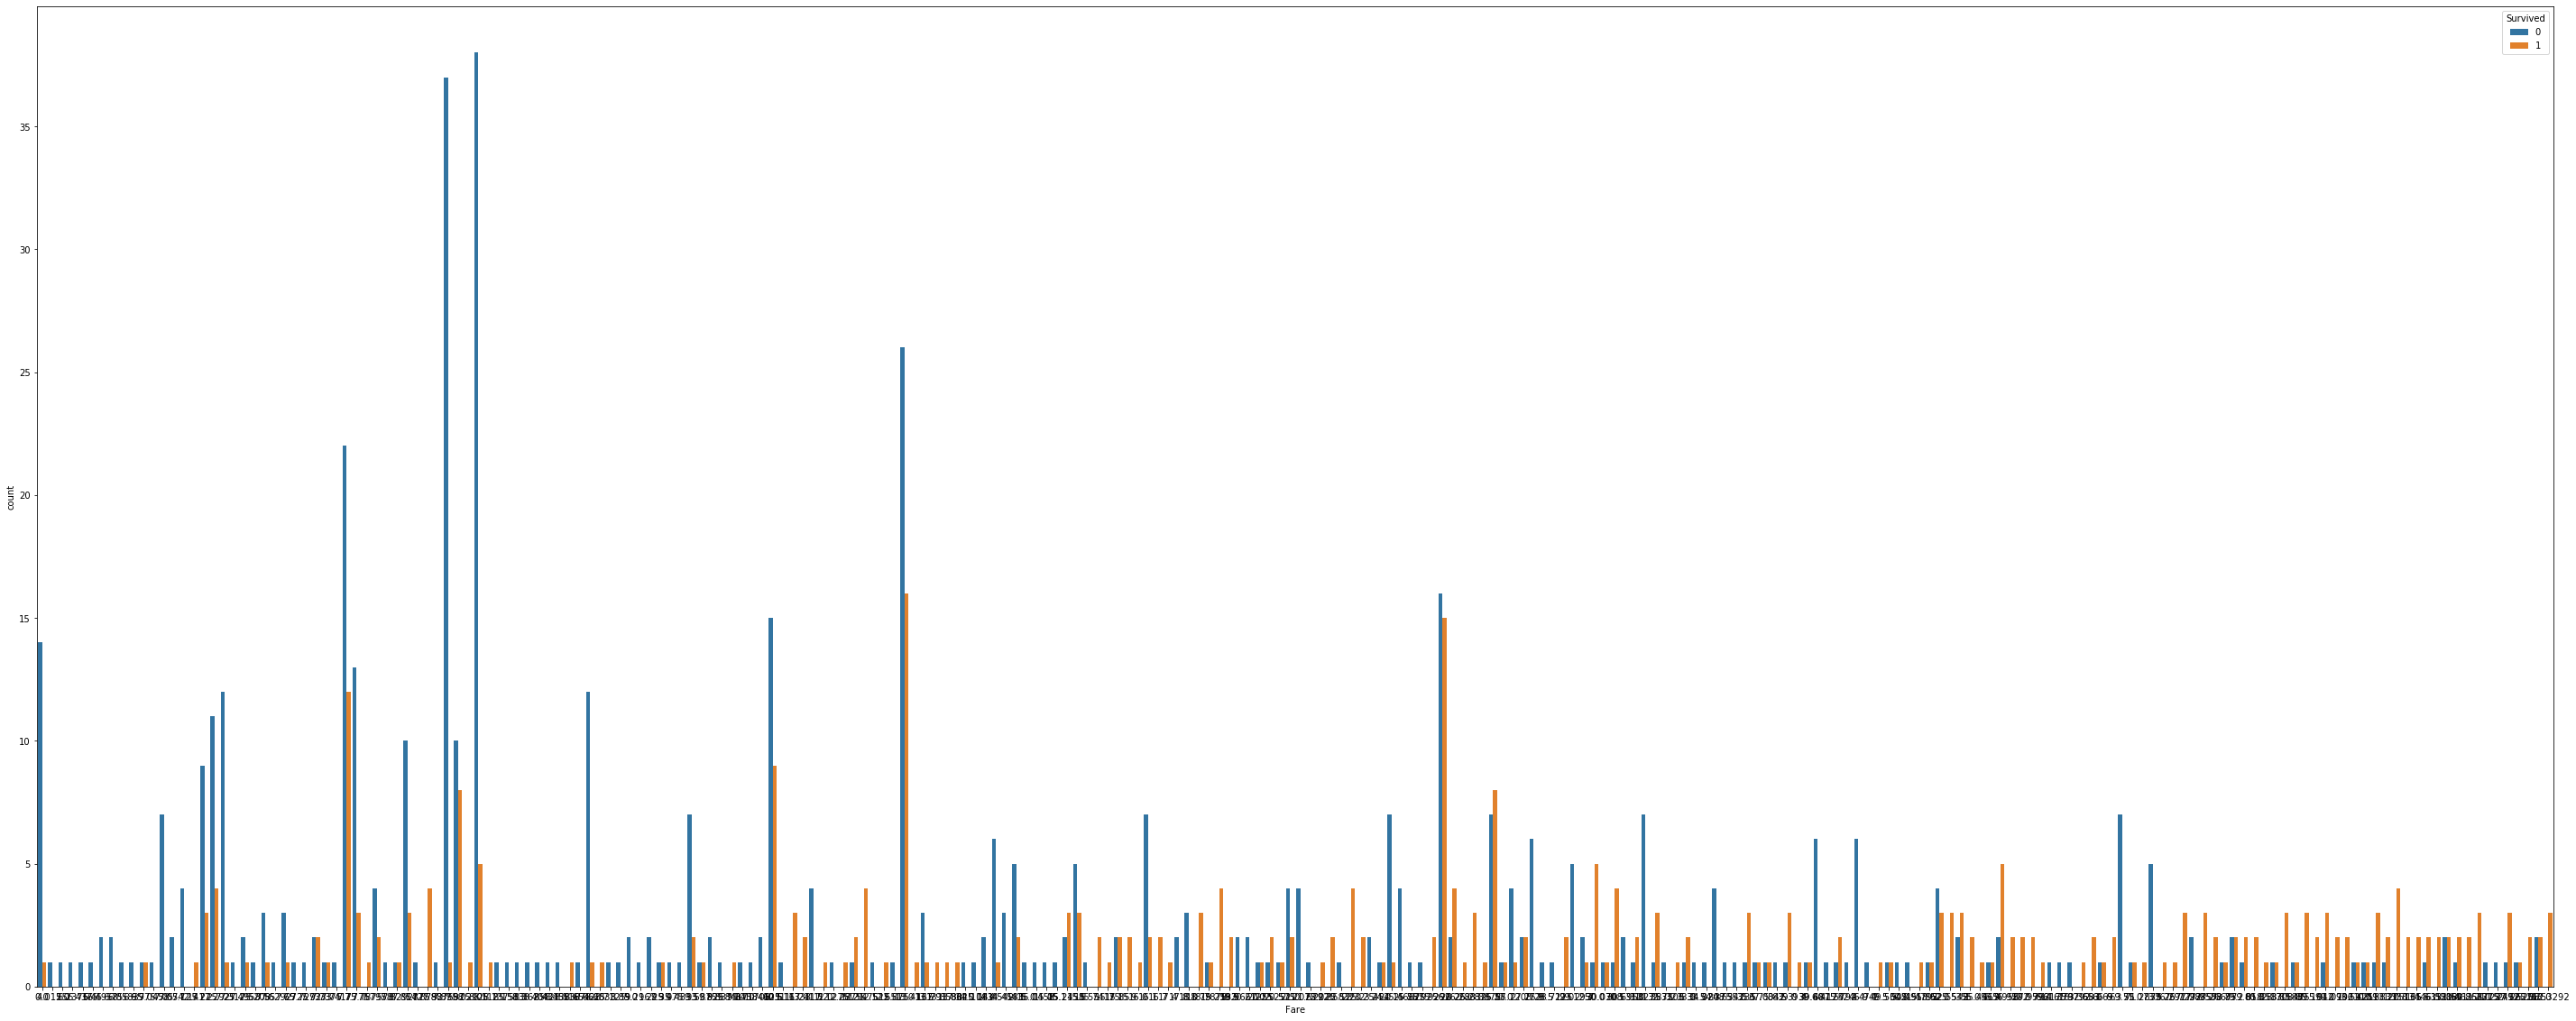

In [16]:
plt.figure(figsize=(50,20))
sns.countplot('Fare', hue='Survived', data=titanic_data)
plt.show()

In [17]:
titanic_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
Family        0
dtype: int64

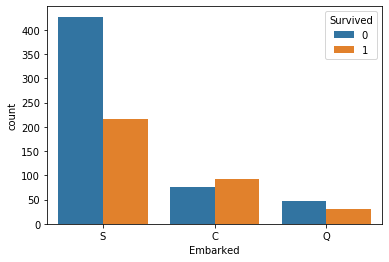

In [18]:
sns.countplot('Embarked', data= titanic_data, hue='Survived')
plt.show()

In [19]:
from collections import Counter
Counter(titanic_data['Embarked'])

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [20]:
titanic_data['Embarked']= titanic_data['Embarked'].fillna('S')

In [23]:
def fill_age():
    random_age = np.random.randint(low=10, high=40, size=1)
    return int(random_age)

In [24]:
titanic_data['Age']= titanic_data['Age'].fillna(fill_age())

In [25]:
titanic_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [26]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [27]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer

In [30]:
scaler = MinMaxScaler()

In [31]:
titanic_data['Age'] = scaler.fit_transform(titanic_data['Age'].values.reshape(-1,1))

In [32]:
titanic_data['Fare'] = scaler.fit_transform(titanic_data['Fare'].values.reshape(-1,1))

In [33]:
titanic_data['Family'] = scaler.fit_transform(titanic_data['Family'].values.reshape(-1,1))

In [34]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
Family      float64
dtype: object

In [36]:
titanic_data = pd.get_dummies(titanic_data)

In [37]:
titanic_data.head()

,Survived,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.271174,0.014151,0.1,0,1,0,0,1
1,1,1,0.472229,0.139136,0.1,1,0,1,0,0
2,1,3,0.321438,0.015469,0.0,1,0,0,0,1
3,1,1,0.434531,0.103644,0.1,1,0,0,0,1
4,0,3,0.434531,0.015713,0.0,0,1,0,0,1


In [38]:
titanic_data.describe()

,Survived,Pclass,Age,Fare,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.376160,0.062858,0.090460,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.486592,0.836071,0.164220,0.096995,0.161346,0.477990,0.477990,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.271174,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.396833,0.028213,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,0.434531,0.060508,0.100000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
discritizer = KBinsDiscretizer(n_bins=5 ,encode='ordinal')

In [46]:
fare_discritized = discritizer.fit_transform(titanic_data['Fare'].values.reshape(-1,1))

In [47]:
fare_discritized.shape

(891, 1)

In [48]:
fare_discritized = fare_discritized.reshape(891)

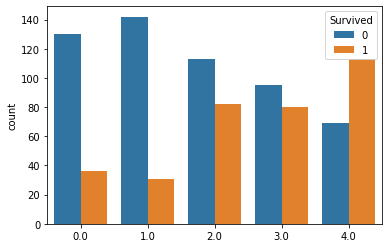

In [49]:
sns.countplot(fare_discritized, hue=titanic_data['Survived'])
plt.show()